In [1]:
!pip install sqlalchemy
!pip install pymysql

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
db_host='18.136.157.135:3306'
username='dm_team2'
user_pass='DM!$Team&27@9!20!'
db_name='project_sales'

In [4]:
conn=create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)

In [5]:
conn.table_names()

['data']

In [6]:
query='select * from data'

In [7]:
data=pd.read_sql(query,conn)

In [8]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
data.shape

(7422, 9)

In [10]:
data.size

66798

In [11]:
data=data.drop(columns=['Product_ID'],axis=1)

In [12]:
data.describe()

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,26,487,883,13,18,5,11
top,14-09-2018 12:00,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,1810,1701,1500,2500,2975,1536


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Source         7422 non-null   object
 2   Mobile         7422 non-null   object
 3   EMAIL          7422 non-null   object
 4   Sales_Agent    7422 non-null   object
 5   Location       7422 non-null   object
 6   Delivery_Mode  7422 non-null   object
 7   Status         7422 non-null   object
dtypes: object(8)
memory usage: 464.0+ KB


In [14]:
data.isnull().sum()

Created          0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [15]:
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Live Chat-Youtube                   2
SMS Campaign                        2
Other                               2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source

In [16]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
                     58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [17]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [18]:
data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [19]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [20]:
data['Mobile'].value_counts()

              1810
XXXXXXX        222
988XXXXXXX     211
984XXXXXXX     177
998XXXXXXX     125
              ... 
9535207621       1
(11XXXXXXX       1
699XXXXXXX       1
600XXXXXXX       1
369XXXXXXX       1
Name: Mobile, Length: 487, dtype: int64

In [21]:
data['EMAIL'].value_counts()

#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
sXXXXXXXrldpay.com       1
kXXXXXXXenture.com       1
sXXXXXXXe@live.com       1
vXXXXXXXpit.gov.in       1
cXXXXXXXeanse.club       1
Name: EMAIL, Length: 883, dtype: int64

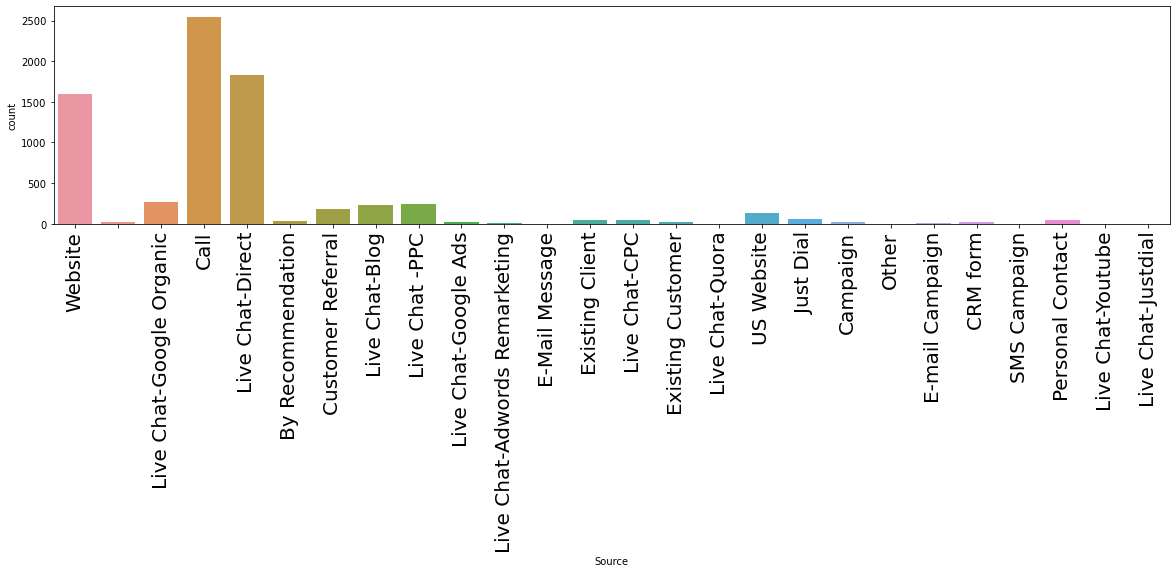

In [22]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(data['Source'])
plt.xticks(rotation =90,fontsize =20)
plt.show()

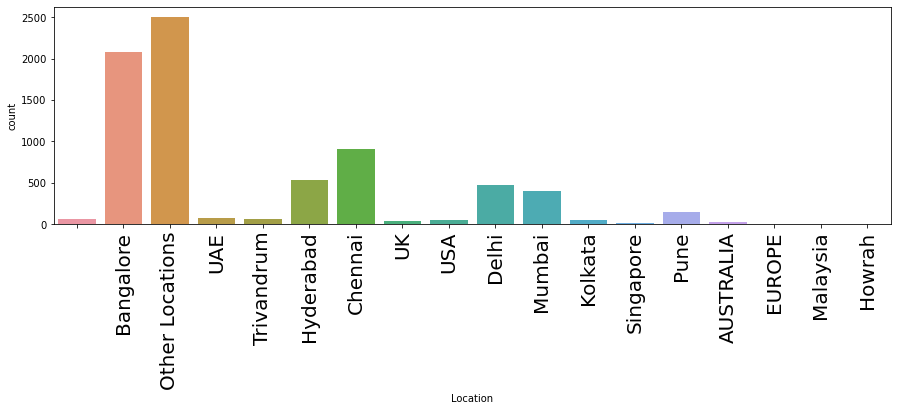

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data['Location'])
plt.xticks(rotation =90,fontsize =20)
plt.show()

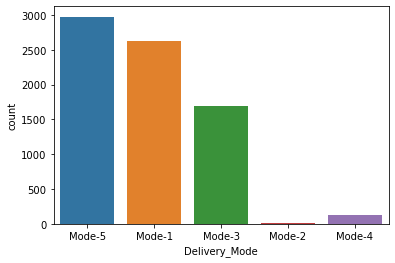

In [24]:
sns.countplot(data['Delivery_Mode'])
plt.show()

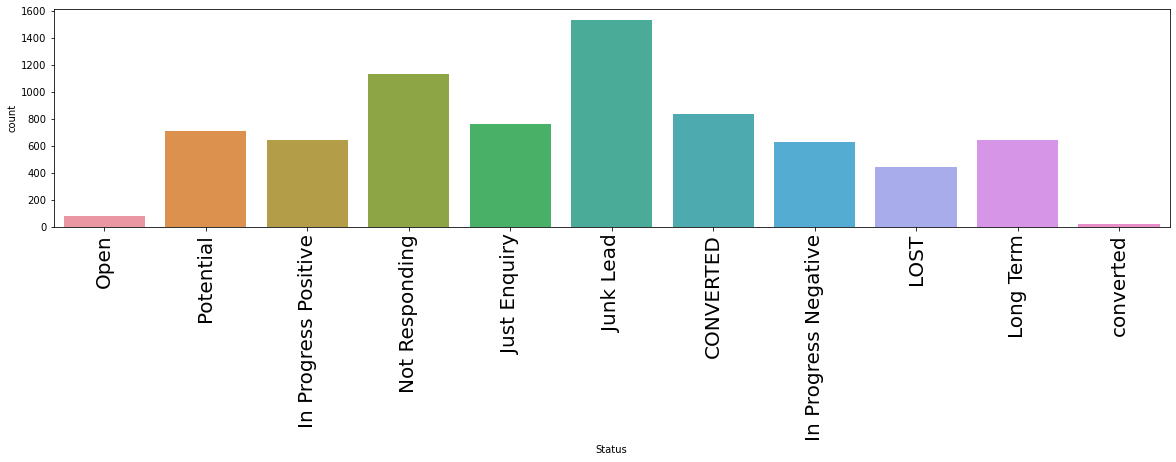

In [25]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(data['Status'])
plt.xticks(rotation =90,fontsize =20)
plt.show()

In [26]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

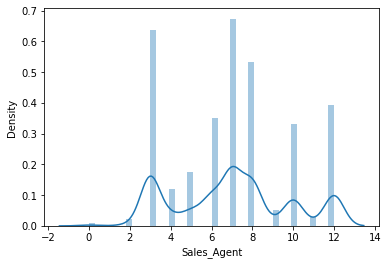

In [27]:
sns.distplot(data['Sales_Agent'])
plt.show()

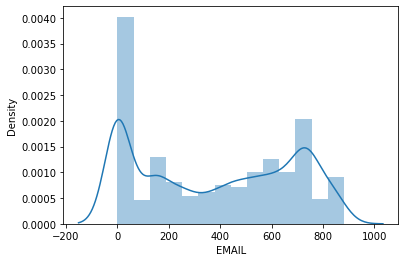

In [28]:
sns.distplot(data['EMAIL'])
plt.show()

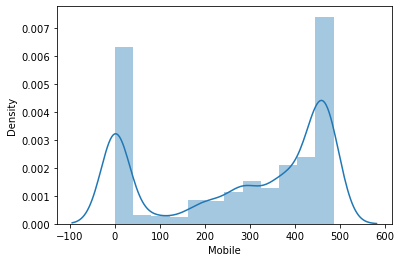

In [29]:
sns.distplot(data['Mobile'])
plt.show()

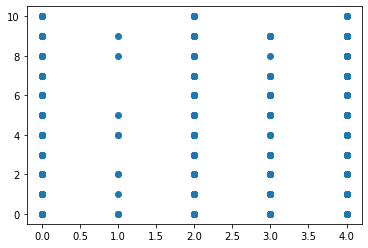

In [30]:
plt.scatter(data['Delivery_Mode'],data['Status'])

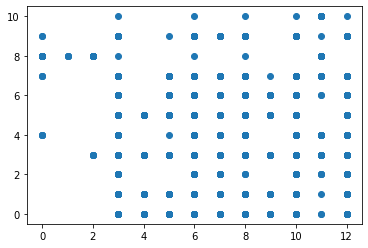

In [31]:
plt.scatter(data['Sales_Agent'],data['Status'])

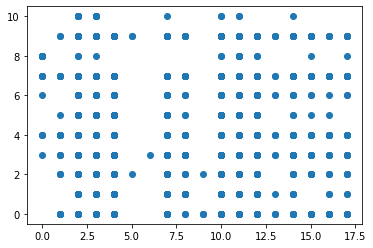

In [32]:
plt.scatter(data['Location'],data['Status'])

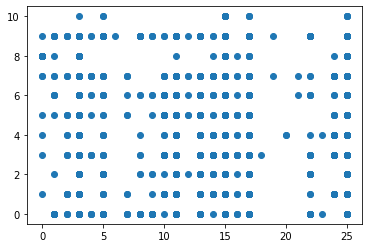

In [33]:
plt.scatter(data['Source'],data['Status'])

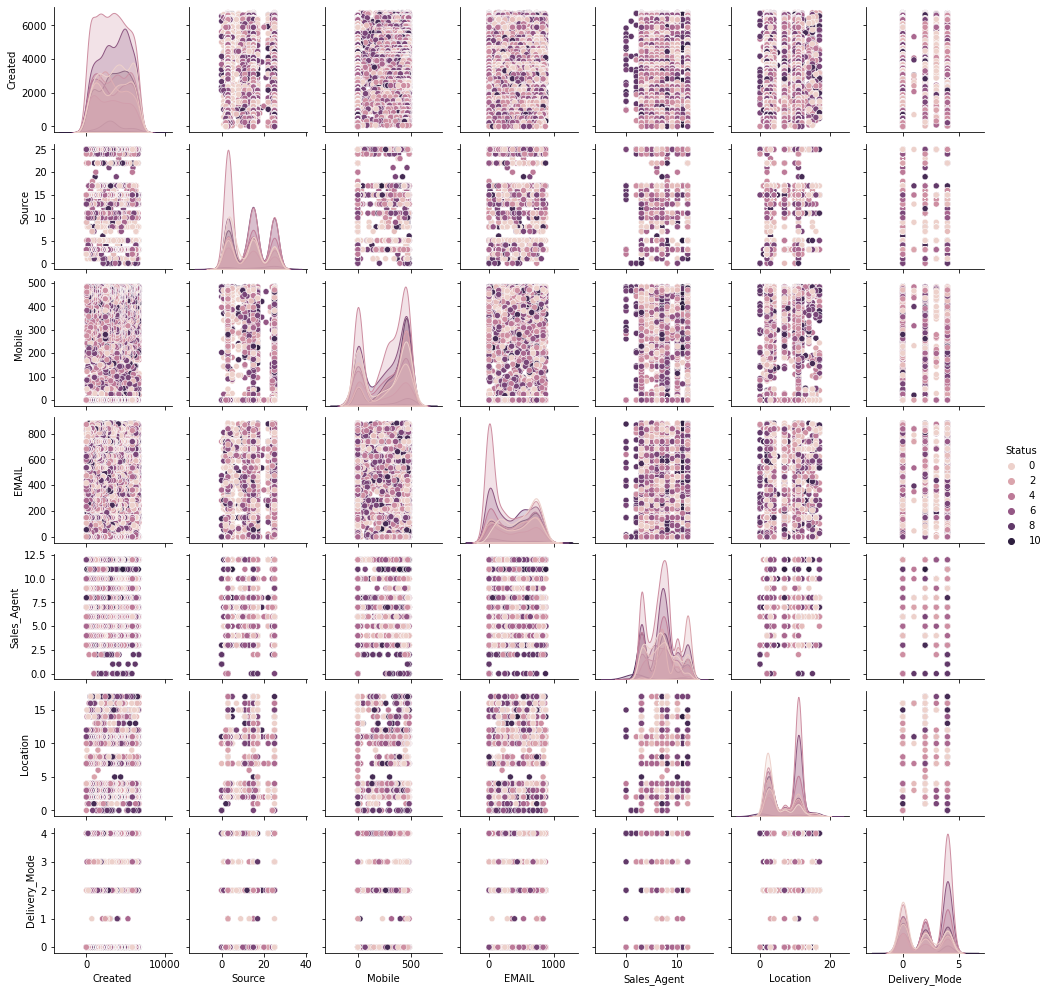

In [34]:
sns.pairplot(data,hue='Status',size=2)

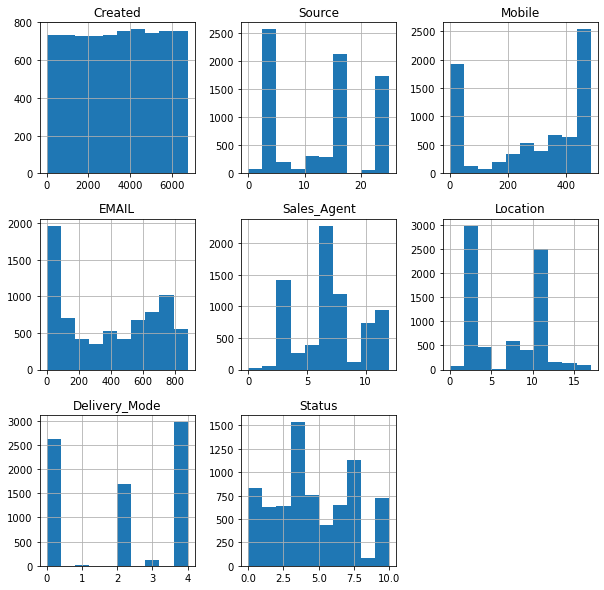

In [35]:
data.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

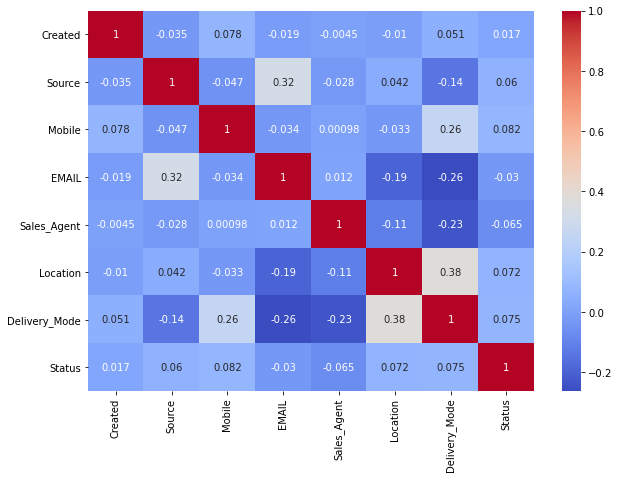

In [36]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [37]:
# treain_test_split
x = data.drop(columns=['Status'])
y = data['Status']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 13)

In [39]:
x_train.shape

(5195, 7)

In [40]:
x_test.shape

(2227, 7)

In [41]:
# LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.19802424786708578

In [42]:
y_test

154     1
3956    3
5513    3
1464    1
4075    7
       ..
6616    1
1924    4
209     2
5194    7
744     7
Name: Status, Length: 2227, dtype: int64

In [43]:
y_predict

array([3, 3, 3, ..., 3, 3, 3])

In [44]:
pd.crosstab(y_test,y_predict)

col_0,0,2,3,7,9
Status,,,,,
0,96,18,118,2,7
1,56,9,97,3,5
2,60,21,118,2,5
3,96,32,313,5,6
4,47,24,159,3,6
5,46,7,77,2,4
6,72,19,93,3,4
7,108,10,224,4,4
8,3,0,17,0,0


In [45]:
confusion_matrix(y_test,y_predict)

array([[ 96,   0,  18, 118,   0,   0,   0,   2,   0,   7,   0],
       [ 56,   0,   9,  97,   0,   0,   0,   3,   0,   5,   0],
       [ 60,   0,  21, 118,   0,   0,   0,   2,   0,   5,   0],
       [ 96,   0,  32, 313,   0,   0,   0,   5,   0,   6,   0],
       [ 47,   0,  24, 159,   0,   0,   0,   3,   0,   6,   0],
       [ 46,   0,   7,  77,   0,   0,   0,   2,   0,   4,   0],
       [ 72,   0,  19,  93,   0,   0,   0,   3,   0,   4,   0],
       [108,   0,  10, 224,   0,   0,   0,   4,   0,   4,   0],
       [  3,   0,   0,  17,   0,   0,   0,   0,   0,   0,   0],
       [ 42,   0,  23, 145,   0,   0,   0,   0,   0,   7,   0],
       [  2,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0]])

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.15      0.40      0.22       241
           1       0.00      0.00      0.00       170
           2       0.13      0.10      0.11       206
           3       0.23      0.69      0.34       452
           4       0.00      0.00      0.00       239
           5       0.00      0.00      0.00       136
           6       0.00      0.00      0.00       191
           7       0.17      0.01      0.02       350
           8       0.00      0.00      0.00        20
           9       0.15      0.03      0.05       217
          10       0.00      0.00      0.00         5

    accuracy                           0.20      2227
   macro avg       0.07      0.11      0.07      2227
weighted avg       0.12      0.20      0.11      2227



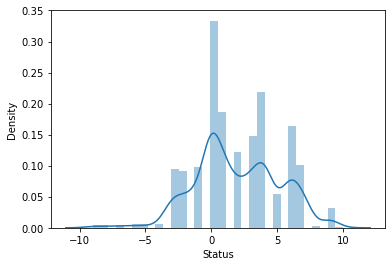

In [47]:
sns.distplot(y_test-y_predict)
plt.show()

In [48]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.24382577458464302

In [49]:
y_test

154     1
3956    3
5513    3
1464    1
4075    7
       ..
6616    1
1924    4
209     2
5194    7
744     7
Name: Status, Length: 2227, dtype: int64

In [50]:
y_predict

array([7, 4, 7, ..., 2, 7, 9])

In [51]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,10
Status,,,,,,,,,,,
0,57,18,27,37,12,16,26,16,0,31,1
1,11,28,8,35,17,13,13,23,0,22,0
2,24,12,59,26,14,13,19,21,0,17,1
3,23,38,18,154,38,27,38,82,2,32,0
4,13,23,20,49,43,5,14,40,4,28,0
5,16,10,9,36,11,13,8,17,0,16,0
6,27,18,7,35,19,20,26,20,0,19,0
7,27,18,43,75,26,8,17,102,4,28,2
8,0,1,0,1,1,0,1,2,14,0,0


In [52]:
confusion_matrix(y_test,y_predict)

array([[ 57,  18,  27,  37,  12,  16,  26,  16,   0,  31,   1],
       [ 11,  28,   8,  35,  17,  13,  13,  23,   0,  22,   0],
       [ 24,  12,  59,  26,  14,  13,  19,  21,   0,  17,   1],
       [ 23,  38,  18, 154,  38,  27,  38,  82,   2,  32,   0],
       [ 13,  23,  20,  49,  43,   5,  14,  40,   4,  28,   0],
       [ 16,  10,   9,  36,  11,  13,   8,  17,   0,  16,   0],
       [ 27,  18,   7,  35,  19,  20,  26,  20,   0,  19,   0],
       [ 27,  18,  43,  75,  26,   8,  17, 102,   4,  28,   2],
       [  0,   1,   0,   1,   1,   0,   1,   2,  14,   0,   0],
       [ 27,  12,  23,  39,  20,   6,  20,  25,   0,  45,   0],
       [  1,   0,   1,   0,   0,   0,   0,   1,   0,   0,   2]])

In [53]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.25      0.24      0.24       241
           1       0.16      0.16      0.16       170
           2       0.27      0.29      0.28       206
           3       0.32      0.34      0.33       452
           4       0.21      0.18      0.20       239
           5       0.11      0.10      0.10       136
           6       0.14      0.14      0.14       191
           7       0.29      0.29      0.29       350
           8       0.58      0.70      0.64        20
           9       0.19      0.21      0.20       217
          10       0.33      0.40      0.36         5

    accuracy                           0.24      2227
   macro avg       0.26      0.28      0.27      2227
weighted avg       0.24      0.24      0.24      2227



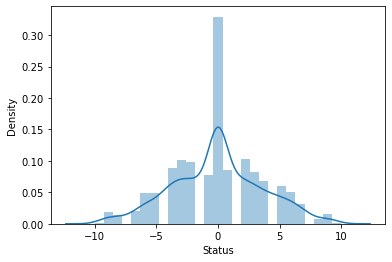

In [54]:
sns.distplot(y_test-y_predict)
plt.show()

In [55]:
# MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.13695554557700942

In [56]:
y_predict

array([2, 2, 2, ..., 2, 2, 2])

In [57]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,5,7,8,9
Status,,,,,,,,
0,32,4,184,7,1,10,1,2
1,10,2,126,15,7,8,0,2
2,7,4,164,8,4,14,0,5
3,16,7,293,74,15,39,2,6
4,9,2,173,23,6,20,1,5
5,12,1,77,23,4,16,0,3
6,15,6,139,9,5,14,1,2
7,20,1,262,27,5,25,0,10
8,0,0,19,0,0,1,0,0


In [58]:
confusion_matrix(y_test,y_predict)

array([[ 32,   4, 184,   7,   0,   1,   0,  10,   1,   2,   0],
       [ 10,   2, 126,  15,   0,   7,   0,   8,   0,   2,   0],
       [  7,   4, 164,   8,   0,   4,   0,  14,   0,   5,   0],
       [ 16,   7, 293,  74,   0,  15,   0,  39,   2,   6,   0],
       [  9,   2, 173,  23,   0,   6,   0,  20,   1,   5,   0],
       [ 12,   1,  77,  23,   0,   4,   0,  16,   0,   3,   0],
       [ 15,   6, 139,   9,   0,   5,   0,  14,   1,   2,   0],
       [ 20,   1, 262,  27,   0,   5,   0,  25,   0,  10,   0],
       [  0,   0,  19,   0,   0,   0,   0,   1,   0,   0,   0],
       [  9,   3, 180,  14,   0,   1,   0,   6,   0,   4,   0],
       [  1,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0]])

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.24      0.13      0.17       241
           1       0.07      0.01      0.02       170
           2       0.10      0.80      0.18       206
           3       0.37      0.16      0.23       452
           4       0.00      0.00      0.00       239
           5       0.08      0.03      0.04       136
           6       0.00      0.00      0.00       191
           7       0.16      0.07      0.10       350
           8       0.00      0.00      0.00        20
           9       0.10      0.02      0.03       217
          10       0.00      0.00      0.00         5

    accuracy                           0.14      2227
   macro avg       0.10      0.11      0.07      2227
weighted avg       0.16      0.14      0.10      2227



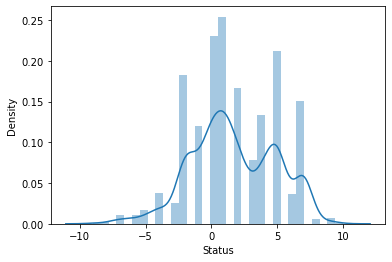

In [60]:
sns.distplot(y_test-y_predict)
plt.show()

In [61]:
# RandomForestClassifier 
model = RandomForestClassifier(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.285136955545577

In [62]:
y_predict

array([3, 7, 3, ..., 2, 7, 7])

In [63]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,10
Status,,,,,,,,,,,
0,87,16,23,25,9,8,33,12,0,27,1
1,17,26,5,51,16,10,15,15,0,15,0
2,22,7,67,26,13,9,9,34,0,19,0
3,27,33,15,195,33,15,22,88,0,24,0
4,13,13,17,66,40,4,10,53,3,20,0
5,20,11,14,44,8,11,6,11,0,11,0
6,27,16,17,45,10,10,23,22,0,21,0
7,21,16,26,95,20,11,14,122,1,24,0
8,0,0,1,4,0,0,0,0,15,0,0


In [64]:
confusion_matrix(y_test,y_predict)

array([[ 87,  16,  23,  25,   9,   8,  33,  12,   0,  27,   1],
       [ 17,  26,   5,  51,  16,  10,  15,  15,   0,  15,   0],
       [ 22,   7,  67,  26,  13,   9,   9,  34,   0,  19,   0],
       [ 27,  33,  15, 195,  33,  15,  22,  88,   0,  24,   0],
       [ 13,  13,  17,  66,  40,   4,  10,  53,   3,  20,   0],
       [ 20,  11,  14,  44,   8,  11,   6,  11,   0,  11,   0],
       [ 27,  16,  17,  45,  10,  10,  23,  22,   0,  21,   0],
       [ 21,  16,  26,  95,  20,  11,  14, 122,   1,  24,   0],
       [  0,   0,   1,   4,   0,   0,   0,   0,  15,   0,   0],
       [ 36,  10,  27,  32,  19,   4,  13,  27,   0,  49,   0],
       [  0,   1,   2,   1,   0,   0,   0,   1,   0,   0,   0]])

In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34       241
           1       0.17      0.15      0.16       170
           2       0.31      0.33      0.32       206
           3       0.33      0.43      0.38       452
           4       0.24      0.17      0.20       239
           5       0.13      0.08      0.10       136
           6       0.16      0.12      0.14       191
           7       0.32      0.35      0.33       350
           8       0.79      0.75      0.77        20
           9       0.23      0.23      0.23       217
          10       0.00      0.00      0.00         5

    accuracy                           0.29      2227
   macro avg       0.27      0.27      0.27      2227
weighted avg       0.27      0.29      0.28      2227



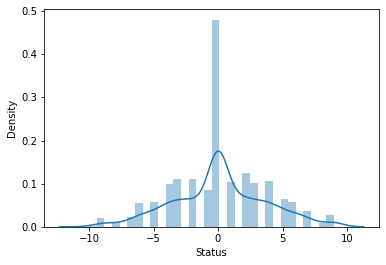

In [66]:
sns.distplot(y_test-y_predict)
plt.show()

In [67]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([7, 0, 3, ..., 3, 7, 2])

In [68]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.1796138302649304


In [69]:
confusion_matrix(y_test,y_predict)

array([[ 78,  32,  20,  34,  18,  10,  15,  19,   0,  15,   0],
       [ 40,  26,  10,  45,   5,   6,  12,  15,   1,  10,   0],
       [ 41,  18,  27,  37,  19,   6,   9,  26,   1,  22,   0],
       [ 83,  47,  19, 174,  32,  10,  19,  45,   1,  22,   0],
       [ 42,  28,  21,  61,  22,   5,  12,  24,   0,  24,   0],
       [ 36,  14,   7,  44,   6,   3,   8,  11,   0,   7,   0],
       [ 55,  20,  10,  43,   9,   2,  13,  27,   0,  12,   0],
       [ 77,  37,  44,  77,  29,   4,  25,  37,   2,  18,   0],
       [  7,   2,   1,   2,   2,   0,   0,   0,   4,   2,   0],
       [ 50,  28,  18,  48,  16,   2,   9,  30,   0,  16,   0],
       [  2,   1,   1,   0,   1,   0,   0,   0,   0,   0,   0]])

In [70]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9
Status,,,,,,,,,,
0,78,32,20,34,18,10,15,19,0,15
1,40,26,10,45,5,6,12,15,1,10
2,41,18,27,37,19,6,9,26,1,22
3,83,47,19,174,32,10,19,45,1,22
4,42,28,21,61,22,5,12,24,0,24
5,36,14,7,44,6,3,8,11,0,7
6,55,20,10,43,9,2,13,27,0,12
7,77,37,44,77,29,4,25,37,2,18
8,7,2,1,2,2,0,0,0,4,2


In [71]:
y_predict = model.predict(x_test)

In [72]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[ 78  32  20  34  18  10  15  19   0  15   0]
 [ 40  26  10  45   5   6  12  15   1  10   0]
 [ 41  18  27  37  19   6   9  26   1  22   0]
 [ 83  47  19 174  32  10  19  45   1  22   0]
 [ 42  28  21  61  22   5  12  24   0  24   0]
 [ 36  14   7  44   6   3   8  11   0   7   0]
 [ 55  20  10  43   9   2  13  27   0  12   0]
 [ 77  37  44  77  29   4  25  37   2  18   0]
 [  7   2   1   2   2   0   0   0   4   2   0]
 [ 50  28  18  48  16   2   9  30   0  16   0]
 [  2   1   1   0   1   0   0   0   0   0   0]]


<AxesSubplot:>

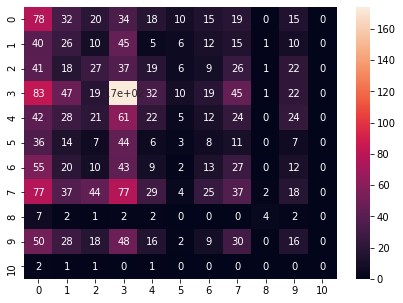

In [73]:
# heat map
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [74]:
print('accuracy:',accuracy_score(y_test,y_predict))

accuracy: 0.1796138302649304


In [75]:
confusion_matrix(y_test,y_predict)

array([[ 78,  32,  20,  34,  18,  10,  15,  19,   0,  15,   0],
       [ 40,  26,  10,  45,   5,   6,  12,  15,   1,  10,   0],
       [ 41,  18,  27,  37,  19,   6,   9,  26,   1,  22,   0],
       [ 83,  47,  19, 174,  32,  10,  19,  45,   1,  22,   0],
       [ 42,  28,  21,  61,  22,   5,  12,  24,   0,  24,   0],
       [ 36,  14,   7,  44,   6,   3,   8,  11,   0,   7,   0],
       [ 55,  20,  10,  43,   9,   2,  13,  27,   0,  12,   0],
       [ 77,  37,  44,  77,  29,   4,  25,  37,   2,  18,   0],
       [  7,   2,   1,   2,   2,   0,   0,   0,   4,   2,   0],
       [ 50,  28,  18,  48,  16,   2,   9,  30,   0,  16,   0],
       [  2,   1,   1,   0,   1,   0,   0,   0,   0,   0,   0]])

In [76]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.31162999550965426

In [77]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,10
Status,,,,,,,,,,,
0,85,17,29,19,12,5,28,18,0,28,0
1,17,23,10,57,14,5,12,18,0,14,0
2,16,3,90,37,14,0,7,20,0,19,0
3,22,25,31,225,24,11,18,78,0,18,0
4,7,9,25,77,43,0,6,45,1,25,1
5,14,13,12,46,8,11,8,11,0,13,0
6,26,16,19,31,13,10,31,21,0,24,0
7,22,13,33,111,16,1,11,116,2,25,0
8,0,1,0,2,0,0,0,0,17,0,0


In [78]:
confusion_matrix(y_test,y_predict)

array([[ 85,  17,  29,  19,  12,   5,  28,  18,   0,  28,   0],
       [ 17,  23,  10,  57,  14,   5,  12,  18,   0,  14,   0],
       [ 16,   3,  90,  37,  14,   0,   7,  20,   0,  19,   0],
       [ 22,  25,  31, 225,  24,  11,  18,  78,   0,  18,   0],
       [  7,   9,  25,  77,  43,   0,   6,  45,   1,  25,   1],
       [ 14,  13,  12,  46,   8,  11,   8,  11,   0,  13,   0],
       [ 26,  16,  19,  31,  13,  10,  31,  21,   0,  24,   0],
       [ 22,  13,  33, 111,  16,   1,  11, 116,   2,  25,   0],
       [  0,   1,   0,   2,   0,   0,   0,   0,  17,   0,   0],
       [ 32,  14,  33,  29,  18,   1,  14,  25,   0,  51,   0],
       [  0,   0,   1,   1,   0,   0,   1,   0,   0,   0,   2]])

In [79]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       241
           1       0.17      0.14      0.15       170
           2       0.32      0.44      0.37       206
           3       0.35      0.50      0.41       452
           4       0.27      0.18      0.21       239
           5       0.25      0.08      0.12       136
           6       0.23      0.16      0.19       191
           7       0.33      0.33      0.33       350
           8       0.85      0.85      0.85        20
           9       0.24      0.24      0.24       217
          10       0.67      0.40      0.50         5

    accuracy                           0.31      2227
   macro avg       0.37      0.33      0.34      2227
weighted avg       0.30      0.31      0.30      2227



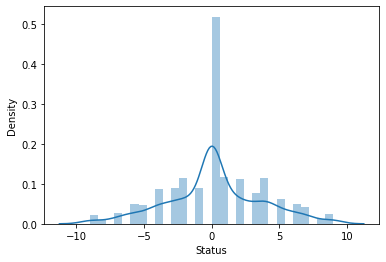

In [80]:
sns.distplot(y_test-y_predict)
plt.show()

In [81]:
# support victor machine
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.20071845532105972

In [82]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 452, 7: 350, 0: 241, 4: 239, 9: 217, 2: 206, 6: 191, 1: 170, 5: 136, 8: 20, 10: 5})


col_0,0,1,2,3,4,5,6,7,8
Status,,,,,,,,,
0,5,0,0,233,0,0,1,2,0
1,1,4,0,158,0,1,2,4,0
2,1,0,0,199,3,1,0,2,0
3,1,1,1,424,5,4,2,14,0
4,0,2,0,232,1,0,0,4,0
5,1,0,0,130,0,0,1,4,0
6,6,0,2,176,0,2,0,5,0
7,2,1,0,331,2,1,3,10,0
8,0,0,0,17,0,0,0,0,3


In [83]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [84]:
x.head()

,0,1,2,3,4,5,6
0,111.083226,-239.609072,-176.015908,14.263384,-7.366584,5.199051,-1.913970
1,111.496612,-389.163469,-189.950055,15.645629,-7.759965,6.192098,-1.598667
2,113.336772,-106.344658,-199.571447,13.107556,-6.727124,6.148567,-1.826756
3,116.070565,477.284872,-219.418231,7.870102,-4.595738,6.058724,-2.297415
4,115.223888,-144.327214,-198.295504,13.448106,-6.865829,6.154442,-1.796179


In [85]:
pca.explained_variance_ratio_

array([9.68092600e-01, 2.28781035e-02, 9.00530244e-03, 1.67457925e-05,
       4.64100472e-06, 2.08540063e-06, 5.21364293e-07])

<AxesSubplot:>

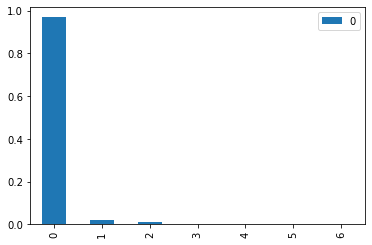

In [86]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [87]:
pca.explained_variance_ratio_[0:-1].sum()

0.999999478635707

In [88]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5
0,111.083226,-239.609072,-176.015908,14.263384,-7.366584,5.199051
1,111.496612,-389.163469,-189.950055,15.645629,-7.759965,6.192098
2,113.336772,-106.344658,-199.571447,13.107556,-6.727124,6.148567
3,116.070565,477.284872,-219.418231,7.870102,-4.595738,6.058724
4,115.223888,-144.327214,-198.295504,13.448106,-6.865829,6.154442


In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 2.350696003592277
MSE: 9.018859452177818
RMSE: 3.0031415970909228


In [90]:
# RMSE/(max(DV)-min(DV))
3.9228/(max(y)-min(y))

0.39228

In [91]:
metrics.accuracy_score(y_test, y_predict)

0.20071845532105972

In [92]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [93]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.19802424786708578,
 'Random Forest': 0.2968118545127975,
 'DecisionTree': 0.24741805118994162,
 'KNN': 0.1796138302649304,
 'MPL': 0.15267175572519084,
 'XGB': 0.29052537045352494,
 'SVM': 0.21867983834755275}

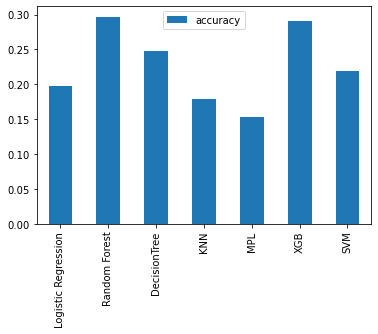

In [94]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();